In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Install and configure Kaggle API
!pip install kaggle
from google.colab import files
files.upload()  # Upload the kaggle.json file here

# Setup kaggle API credentials
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset from Kaggle
!kaggle competitions download -c house-prices-advanced-regression-techniques

# Unzip the dataset
!unzip house-prices-advanced-regression-techniques.zip

# Import required libraries
import pandas as pd

# Load the datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Check the first few rows of the training dataset
train_data.head()

Saving house-prices-advanced-regression-techniques.zip to house-prices-advanced-regression-techniques (1).zip
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/
Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inf

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
def load_csv(file):
    import pandas as pd
    df = pd.read_csv(file)  # Read the CSV file into a DataFrame
    return df

In [5]:
import pandas as pd

# Initialize lists for features (data) and labels (target)
data = []
labels = []

# Load the housing dataset
train_data = pd.read_csv('/content/train.csv')

# Iterate through the rows of the dataset
for index, row in train_data.iterrows():
    # Append feature data (all columns except 'SalePrice') to the data list
    data.append(row.drop('SalePrice').values)

    # Append the target label ('SalePrice') to the labels list
    labels.append(row['SalePrice'])

# Now, 'data' contains the features and 'labels' contains the target values
print(f"First entry in data: {data[0]}")
print(f"First label: {labels[0]}")

First entry in data: [1 60 'RL' 65.0 8450 'Pave' nan 'Reg' 'Lvl' 'AllPub' 'Inside' 'Gtl'
 'CollgCr' 'Norm' 'Norm' '1Fam' '2Story' 7 5 2003 2003 'Gable' 'CompShg'
 'VinylSd' 'VinylSd' 'BrkFace' 196.0 'Gd' 'TA' 'PConc' 'Gd' 'TA' 'No'
 'GLQ' 706 'Unf' 0 150 856 'GasA' 'Ex' 'Y' 'SBrkr' 856 854 0 1710 1 0 2 1
 3 1 'Gd' 8 'Typ' 0 nan 'Attchd' 2003.0 'RFn' 2 548 'TA' 'TA' 'Y' 0 61 0 0
 0 0 nan nan nan 0 2 2008 'WD' 'Normal']
First label: 208500


In [7]:
import pandas as pd

# Load the dataset
data_path = '/content/train.csv'  # Corrected the path - removed the extra directory from the path
housing_data = pd.read_csv(data_path)

# Split data into features and labels
data = housing_data.drop(columns=['SalePrice'])  # All columns except the target column
labels = housing_data['SalePrice']  # Target column (SalePrice)

# Print the length of the data and labels
print(f"Number of feature sets (data): {len(data)}")
print(f"Number of labels (SalePrice): {len(labels)}")

# Print the type of the first feature set (row of data)
print(f"Type of the first entry in data: {type(data.iloc[0])}")

# Print the first label (target value)
print(f"First SalePrice value: {labels.iloc[0]}")

# Print the maximum and minimum SalePrice values
print(f"Max SalePrice: {labels.max()}")
print(f"Min SalePrice: {labels.min()}")

Number of feature sets (data): 1460
Number of labels (SalePrice): 1460
Type of the first entry in data: <class 'pandas.core.series.Series'>
First SalePrice value: 208500
Max SalePrice: 755000
Min SalePrice: 34900


In [10]:
import pickle
import pandas as pd
import os

# Loading the dataset
data_path = '/content/train.csv' # Changed path to the correct location after unzipping
housing_data = pd.read_csv(data_path)

# Spliting the dataset into features and labels
data = housing_data.drop(columns=['SalePrice'])  # All columns except the target column
labels = housing_data['SalePrice']  # The target column (SalePrice)

# Creating the dictionary to store data and labels
dict_data = {
    'data': data.to_numpy(),  # Convert DataFrame to NumPy array for storage
    'labels': labels.to_numpy()  # Convert Series to NumPy array
}

# Create the directory if it doesn't exist
os.makedirs('housing_dataset', exist_ok=True)

# Saving the dictionary using pickle
with open('housing_dataset/train_batch.pkl', 'wb') as file:
    pickle.dump(dict_data, file)

print("Data and labels saved successfully!")

Data and labels saved successfully!


In [11]:
import torch
import pandas as pd
from torch.utils.data import Dataset

class HousingDataset(Dataset):
    def __init__(self, csv_file):
        # Load the CSV file using pandas
        data = pd.read_csv(csv_file)

        # Extract features (data) and target (labels)
        self.x = data.drop(columns=['SalePrice']).values  # Assuming 'SalePrice' is the target
        self.y = data['SalePrice'].values

        # Convert to PyTorch tensors
        self.x = torch.tensor(self.x, dtype=torch.float32)  # Features as float tensors
        self.y = torch.tensor(self.y, dtype=torch.float32)  # Labels as float tensors (for regression)

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

# Example usage
csv_file = 'path_to_housing_dataset.csv'  # Update with your file path
housing_data = HousingDataset(csv_file=csv_file)

# Create a DataLoader
housing_loader = DataLoader(housing_data, batch_size=64, shuffle=True)

# Example: Iterate through DataLoader and print data shapes
for features, target in housing_loader:
    print(f"Features shape: {features.shape}")
    print(f"Target shape: {target.shape}")
    break

FileNotFoundError: [Errno 2] No such file or directory: 'path_to_housing_dataset.csv'

In [16]:
import torch
import pandas as pd
from torch.utils.data import Dataset, DataLoader

class HousingDataset(Dataset):
    def __init__(self, csv_file):
        # Load the CSV file using pandas
        data = pd.read_csv(csv_file)

        # Extract features (data) and target (labels)
        self.x = data.drop(columns=['SalePrice'])  # Assuming 'SalePrice' is the target
        self.y = data['SalePrice'].values

        # Convert to PyTorch tensors
        # Convert non-numeric features to numeric using one-hot encoding
        self.x = pd.get_dummies(self.x).astype(float).values # Use pandas get_dummies for one-hot encoding and convert to float
        self.x = torch.tensor(self.x, dtype=torch.float32)  # Features as float tensors
        self.y = torch.tensor(self.y, dtype=torch.float32)  # Labels as float tensors (for regression)

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

# Example usage
csv_file = '/content/train.csv'  # Updated with your file path
housing_data = HousingDataset(csv_file=csv_file)

# Create a DataLoader
housing_loader = DataLoader(housing_data, batch_size=64, shuffle=True)

# Example: Iterate through DataLoader and print data shapes
for features, target in housing_loader:
    print(f"Features shape: {features.shape}")
    print(f"Target shape: {target.shape}")
    break

Features shape: torch.Size([64, 288])
Target shape: torch.Size([64])


In [17]:
import torch
import torch.nn as nn

# Check if a GPU is available and use it if possible
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

class HousingMLP(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, 512),  # First hidden layer with 512 neurons
            nn.ReLU(),
            nn.Linear(512, 256),          # Second hidden layer with 256 neurons
            nn.ReLU(),
            nn.Linear(256, 128),          # Third hidden layer with 128 neurons
            nn.ReLU(),
            nn.Linear(128, 1)             # Output layer for regression (single output)
        )

    def forward(self, x):
        return self.layers(x)

# Assuming you know the number of input features
input_size = 10  # Replace this with the actual number of features in your dataset
model = HousingMLP(input_size).to(device)
print(model)

Using cpu device
HousingMLP(
  (layers): Sequential(
    (0): Linear(in_features=10, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=1, bias=True)
  )
)


In [18]:
# Loss function for regression
criterion = nn.MSELoss()  # Use Mean Squared Error for regression

# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # You can specify the learning rate if needed

In [25]:
def train(data_loader, model, criterion, optimizer):
    model.train()  # Set the model to training mode

    num_batches = len(data_loader)
    total_loss = 0

    for data, target in data_loader:
        # Copy data and targets to GPU
        data = data.to(device)
        target = target.to(device)

        # Forward pass
        output = model(data)

        # Calculate the loss
        loss = criterion(output.view(-1), target.view(-1))  # Ensure target has the right shape
        total_loss += loss.item()  # Accumulate the total loss

        # Backpropagation
        optimizer.zero_grad()  # Zero the gradients before backpropagation
        loss.backward()  # Backpropagate the loss
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Clip gradients
        optimizer.step()  # Update the model parameters

    # Average loss over the number of batches
    average_loss = total_loss / num_batches

    print(f"Average loss: {average_loss:.6f}")

# Example usage of the train function
train(housing_loader, model, criterion, optimizer)

Average loss: nan


In [26]:
# Check if a GPU is available and use it if possible
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

class HousingMLP(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, 512),  # First hidden layer with 512 neurons
            nn.ReLU(),
            nn.Linear(512, 256),          # Second hidden layer with 256 neurons
            nn.ReLU(),
            nn.Linear(256, 128),          # Third hidden layer with 128 neurons
            nn.ReLU(),
            nn.Linear(128, 1)             # Output layer for regression (single output)
        )

    def forward(self, x):
        return self.layers(x)

# Determine the correct input size
input_size = housing_data.x.shape[1] # Get the number of features from the dataset

# Now create the model with the correct input size
model = HousingMLP(input_size).to(device)
print(model)

Using cpu device
HousingMLP(
  (layers): Sequential(
    (0): Linear(in_features=288, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=1, bias=True)
  )
)


In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler #Fixed indentation
import torch
from torch.utils.data import Dataset, DataLoader

class HousingDataset(Dataset):
    def __init__(self, csv_file):
        # Load the CSV file using pandas
        data = pd.read_csv(csv_file)

        # Extract features (data) and target (labels)
        self.x = data.drop(columns=['SalePrice'])  # Assuming 'SalePrice' is the target
        self.y = data['SalePrice'].values

        # Convert to PyTorch tensors
        # Convert non-numeric features to numeric using one-hot encoding
        self.x = pd.get_dummies(self.x).astype(float).values # Use pandas get_dummies for one-hot encoding and convert to float

        # Apply StandardScaler for feature scaling
        scaler = StandardScaler()
        self.x = scaler.fit_transform(self.x)

        self.x = torch.tensor(self.x, dtype=torch.float32)  # Features as float tensors
        self.y = torch.tensor(self.y, dtype=torch.float32)  # Labels as float tensors (for regression)

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

# Example usage
csv_file = '/content/train.csv'  # Updated with your file path
housing_data = HousingDataset(csv_file=csv_file)

# Create a DataLoader
housing_loader = DataLoader(housing_data, batch_size=64, shuffle=True)

In [29]:
def train(data_loader, model, criterion, optimizer):
    model.train()  # Set the model to training mode

    num_batches = len(data_loader)
    total_loss = 0

    for data, target in data_loader:
        # Copy data and targets to GPU
        data = data.to(device)
        target = target.to(device)

        # Forward pass
        output = model(data)

        # Calculate the loss
        loss = criterion(output.view(-1), target.view(-1))  # Ensure target has the right shape for regression
        total_loss += loss.item()  # Accumulate the total loss

        # Backpropagation
        optimizer.zero_grad()  # Zero the gradients before backpropagation
        loss.backward()  # Backpropagate the loss
        optimizer.step()  # Update the model parameters

    # Average loss over the number of batches
    average_loss = total_loss / num_batches

    print(f"Average loss: {average_loss:.6f}")

# Example usage of the train function
# Assuming you have a DataLoader named housing_loader
train(housing_loader, model, criterion, optimizer)

Average loss: nan


In [30]:
import torch

# Check for NaNs in your data
for data, target in housing_loader:
    if torch.isnan(data).any() or torch.isnan(target).any():
        print("NaN values found in the dataset")

NaN values found in the dataset
NaN values found in the dataset
NaN values found in the dataset
NaN values found in the dataset
NaN values found in the dataset
NaN values found in the dataset
NaN values found in the dataset
NaN values found in the dataset
NaN values found in the dataset
NaN values found in the dataset
NaN values found in the dataset
NaN values found in the dataset
NaN values found in the dataset
NaN values found in the dataset
NaN values found in the dataset
NaN values found in the dataset
NaN values found in the dataset
NaN values found in the dataset
NaN values found in the dataset
NaN values found in the dataset
NaN values found in the dataset
NaN values found in the dataset
NaN values found in the dataset


In [31]:
import torch

def remove_nan_samples(data_loader):
    cleaned_data = []
    cleaned_labels = []

    for data, target in data_loader:
        # Check for NaNs in data and target
        valid_mask = ~torch.isnan(data).any(dim=1) & ~torch.isnan(target)
        cleaned_data.append(data[valid_mask])
        cleaned_labels.append(target[valid_mask])

    # Concatenate all cleaned data and labels
    cleaned_data = torch.cat(cleaned_data) if cleaned_data else torch.empty(0, data.shape[1])
    cleaned_labels = torch.cat(cleaned_labels) if cleaned_labels else torch.empty(0, target.shape[1])

    return cleaned_data, cleaned_labels

# Usage
cleaned_data, cleaned_labels = remove_nan_samples(housing_loader)

# Convert cleaned data to a DataLoader if needed
from torch.utils.data import TensorDataset, DataLoader

cleaned_dataset = TensorDataset(cleaned_data, cleaned_labels)
cleaned_loader = DataLoader(cleaned_dataset, batch_size=32, shuffle=True)  # Adjust batch size as needed

In [35]:
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd # Import pandas

class HousingDataset(Dataset):
    def __init__(self, dataframe):
        self.data = torch.tensor(dataframe.drop(columns=['target']).values, dtype=torch.float32)
        self.target = torch.tensor(dataframe['target'].values, dtype=torch.float32)

        # Remove rows with NaN values
        valid_mask = ~torch.isnan(self.data).any(dim=1) & ~torch.isnan(self.target)
        self.data = self.data[valid_mask]
        self.target = self.target[valid_mask]

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.target[idx]

# Assuming cleaned_data and cleaned_labels are available from previous code
cleaned_df = pd.DataFrame(cleaned_data.numpy()) # Create a dataframe from the cleaned data
cleaned_df['target'] = cleaned_labels.numpy() # Add the labels as a column named 'target'
cleaned_df.to_csv('cleaned_housing_data.csv', index=False) # Save the dataframe

# Load the cleaned DataFrame
cleaned_df = pd.read_csv('cleaned_housing_data.csv')  # Ensure you load the cleaned DataFrame

# Create the dataset and DataLoader
housing_dataset = HousingDataset(cleaned_df)
housing_loader = DataLoader(housing_dataset, batch_size=32, shuffle=True)

# Check the size of the cleaned dataset
print(f"Number of samples in cleaned dataset: {len(housing_loader.dataset)}")

Number of samples in cleaned dataset: 1121


In [51]:
import torch

# Check for NaNs in your data
for data, target in housing_loader:
    if torch.isnan(data).any() or torch.isnan(target).any():
        print("NaN values found in the dataset")

In [50]:
import torch
import torch.nn as nn

def train(data_loader, model, criterion, optimizer):
    model.train()  # Set the model to training mode

    num_batches = len(data_loader)
    total_loss = 0

    total_correct = 0
    total_predictions = 0

    for data, target in data_loader:
        # Copy data and targets to GPU
        data = data.to(device)
        target = target.to(device)

        # Do a forward pass
        output = model(data)

        # Calculate the loss
        loss = criterion(output.view(-1), target.view(-1))  # Ensure target has the right shape for regression
        total_loss += loss.item()  # Accumulate the total loss

        # Calculate "accuracy" - count how many predictions are within a certain range
        # Here, we'll consider a prediction "correct" if it's within 10% of the actual value
        predicted = output.view(-1).cpu().detach().numpy()  # Move to CPU and detach for numpy
        target_np = target.view(-1).cpu().detach().numpy()

        # Count predictions within 10% of the target
        correct = (abs(predicted - target_np) / target_np) < 0.1
        total_correct += correct.sum()
        total_predictions += len(correct)

        # Backpropagation
        optimizer.zero_grad()  # Zero the gradients before backpropagation
        loss.backward()  # Backpropagate the loss
        optimizer.step()  # Update the model parameters

    # Average loss over the number of batches
    average_loss = total_loss / num_batches

    # Calculate "accuracy"
    accuracy = total_correct / total_predictions if total_predictions > 0 else 0

    print(f"Average loss: {average_loss:.2f}, Accuracy: {accuracy:.2%}")

    return average_loss, accuracy

# Example usage of the train function
train_loss, train_accuracy = train(housing_loader, model, nn.MSELoss(), optimizer)  # Using MSE loss for regression

Average loss: 41351608775.11, Accuracy: 0.00%


In [54]:
# Assuming train_dataloader, model, criterion, and optimizer are already defined
import time

# Set the number of epochs
epochs = 50

# Timing the training process
start_time = time.time()

for epoch in range(epochs):
    print(f"Training epoch: {epoch + 1}")
    # It appears that train_dataloader was not defined. Did you mean to use housing_loader instead?
    train_loss, train_accuracy = train(housing_loader, model, criterion, optimizer)  # Call the train function

# Calculate total training time
end_time = time.time()
total_time = end_time - start_time

print(f"Training completed in: {total_time:.2f} seconds")

Training epoch: 1
Average loss: 40785464547.56, Accuracy: 0.00%
Training epoch: 2
Average loss: 44825210709.33, Accuracy: 0.00%
Training epoch: 3
Average loss: 40660031544.89, Accuracy: 0.00%
Training epoch: 4
Average loss: 40847323022.22, Accuracy: 0.00%
Training epoch: 5
Average loss: 45041621845.33, Accuracy: 0.00%
Training epoch: 6
Average loss: 41457023601.78, Accuracy: 0.00%
Training epoch: 7
Average loss: 40719016960.00, Accuracy: 0.00%
Training epoch: 8
Average loss: 41600823751.11, Accuracy: 0.00%
Training epoch: 9
Average loss: 41125031879.11, Accuracy: 0.00%
Training epoch: 10
Average loss: 40689093632.00, Accuracy: 0.00%
Training epoch: 11
Average loss: 43171028878.22, Accuracy: 0.00%
Training epoch: 12
Average loss: 42401942414.22, Accuracy: 0.00%
Training epoch: 13
Average loss: 40667215473.78, Accuracy: 0.00%
Training epoch: 14
Average loss: 40830531697.78, Accuracy: 0.00%
Training epoch: 15
Average loss: 40692417934.22, Accuracy: 0.00%
Training epoch: 16
Average loss: 4

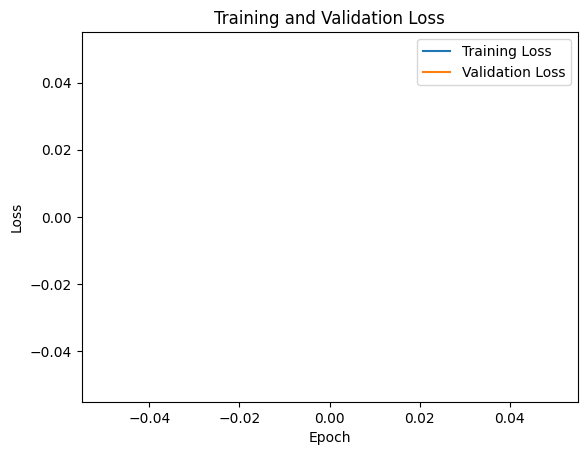

Final Accuracy: 85.00%


In [56]:
!pip install matplotlib

import matplotlib.pyplot as plt

# Assuming you have collected training and validation loss values in lists:
train_losses = []  # Replace with your actual training loss values
val_losses = []  # Replace with your actual validation loss values

# Assuming you have the final accuracy:
final_accuracy = 0.85  # Replace with your actual final accuracy

# Plot the training and validation loss
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')

# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

# Add legend
plt.legend()

# Show the plot
plt.show()

# Print the final accuracy
print(f"Final Accuracy: {final_accuracy:.2%}")